In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import ascii
import numpy as np
from astropy.io import fits

SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)

# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rc('font', family='Times New Roman')

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
import seaborn as sns
sns.set_palette("muted")

In [5]:
r

0.692709012440737
1.3295739742362471
2.5519618212237503
4.898192400858816
9.401507732715986
18.045095091164857


In [3]:
wgplusses = []
wgcrosses = []
ggs = []

In [2]:
wgplusses = []
wgcrosses = []
ggs = []

wgplusses_z = []
wgcrosses_z = []
ggs_z = []
for i in range(643,644):
    for j, f in enumerate((f'OUTPUT_CAMELS_DM_LH_z/wgp_LH{i}.dat',f'OUTPUT_CAMELS_DM_LH_z/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wgplusses_z.append(wgp)
    wgcrosses_z.append(wgx)
    ggs_z.append(wgg)
    wgplusses.append(wgp)
    wgcrosses.append(wgx)
    ggs.append(wgg)

In [10]:
wgplusses_x = []
wgcrosses_x = []
ggs_x = []
for i in range(1000):
    for j, f in enumerate((f'OUTPUT_CAMELS_LH_x/wgp_LH{i}.dat',f'OUTPUT_CAMELS_LH_x/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
            #print(r)
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
            
    wgp = wgp; wgx=wgx
    
    wgplusses_x.append(wgp)
    wgcrosses_x.append(wgx)
    ggs_x.append(wgg)
    wgplusses.append(wgp)
    wgcrosses.append(wgx)
    ggs.append(wgg)

In [11]:
wgplusses_y = []
wgcrosses_y = []
ggs_y = []
for i in range(1000):
    for j, f in enumerate((f'OUTPUT_CAMELS_LH_y/wgp_LH{i}.dat',f'OUTPUT_CAMELS_LH_y/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
#    wgp = -wgp; wgx=-wgx
    
    wgplusses_y.append(wgp)
    wgcrosses_y.append(wgx)
    ggs_y.append(wgg)
    wgplusses.append(wgp)
    wgcrosses.append(wgx)
    ggs.append(wgg)

In [3]:
wgplusses = np.array(wgplusses)
wgcrosses = np.array(wgcrosses)
# wgplusses_x = np.array(wgplusses_x); wgplusses_y = np.array(wgplusses_y); 
wgplusses_z = np.array(wgplusses_z)
# wgcrosses_x = np.array(wgcrosses_x); wgcrosses_y = np.array(wgcrosses_y); 
wgcrosses_z = np.array(wgcrosses_z)
ggs = np.array(ggs)
print(np.sum(np.isnan(wgplusses)), np.sum(np.isnan(wgcrosses)))

# np.savez("../wgplus_data.npz", x=wgplusses_x, y=wgplusses_y, z=wgplusses_z)

0 0


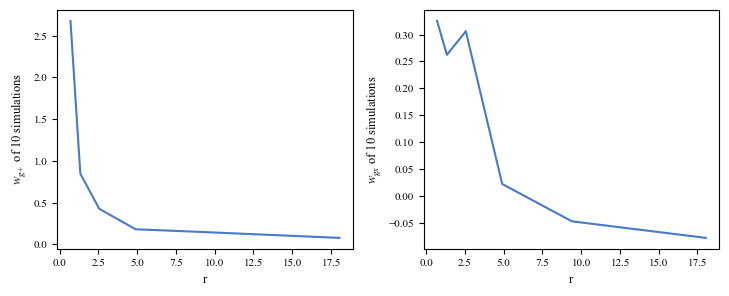

In [5]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(22/3,3))
for j in range(1):
    ax[0].plot(r, wgplusses_z[j], label=f'{j}')
    ax[1].plot(r, wgcrosses_z[j], label=f'{j}')
    #print(xip[860+j])
    
ax[0].set_ylabel(r"$w_{g+}$ of 10 simulations")
ax[0].set_xlabel("r")
# ax[0].legend(); ax[1].legend()
ax[1].set_ylabel(r"$w_{gx}$ of 10 simulations")
ax[1].set_xlabel("r")
fig.tight_layout()

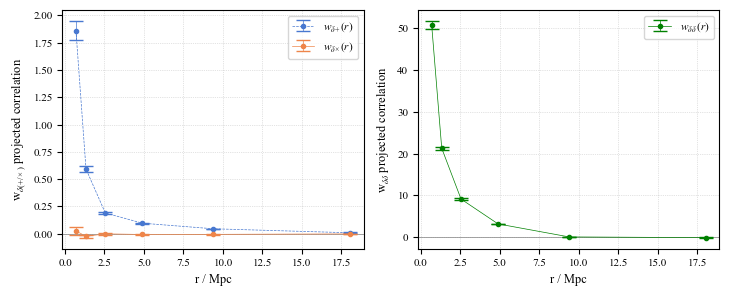

In [15]:
sqrtNz = np.sqrt(wgplusses_z.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(22/3,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wgplusses_y,axis=0), yerr=np.std(wgplusses_z,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wgcrosses_y,axis=0), yerr=np.std(wgcrosses_z,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}\,(r)$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(ggs_z,axis=0), yerr=np.std(ggs_z,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5, c='green',label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
# ax[0].set_ylim(-0.1*np.abs(ax[0].get_ylim()).max(), np.abs(ax[0].get_ylim()).max())
# ax[1].set_ylim(-0.1*np.abs(ax[1].get_ylim()).max(), np.abs(ax[1].get_ylim()).max())
# ax[0].set_title(r"LH (0 - 1000) average position-shape")
ax[0].set_xlabel("r / Mpc")
ax[0].set_ylabel(r"w$_{\delta (+/\times)}$ projected correlation")
ax[0].legend() ; ax[1].legend()
# ax[1].set_title("LH (0 - 1000) average auto correlation")
ax[1].set_xlabel("r / Mpc")
ax[1].set_ylabel(r"w$_{\delta\delta}$ projected correlation")
fig.tight_layout()

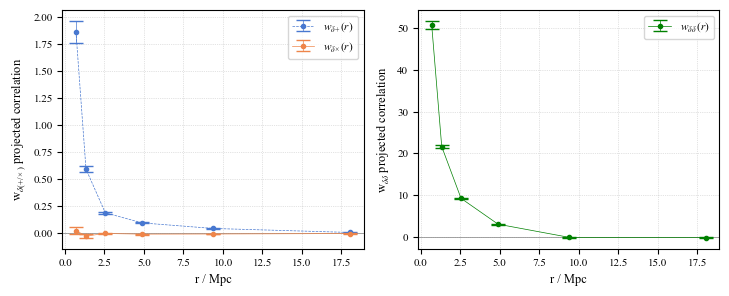

In [16]:
sqrtNy = np.sqrt(wgplusses_y.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(22/3,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wgplusses_y,axis=0), yerr=np.std(wgplusses_y,axis=0)/sqrtNy, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wgcrosses_y,axis=0), yerr=np.std(wgcrosses_y,axis=0)/sqrtNy, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}\,(r)$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(ggs_y,axis=0), yerr=np.std(ggs_y,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5, c='green',label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
# ax[0].set_ylim(-0.1*np.abs(ax[0].get_ylim()).max(), np.abs(ax[0].get_ylim()).max())
# ax[1].set_ylim(-0.1*np.abs(ax[1].get_ylim()).max(), np.abs(ax[1].get_ylim()).max())
# ax[0].set_title(r"LH (0 - 1000) average position-shape")
ax[0].set_xlabel("r / Mpc")
ax[0].set_ylabel(r"w$_{\delta (+/\times)}$ projected correlation")
ax[0].legend() ; ax[1].legend()
# ax[1].set_title("LH (0 - 1000) average auto correlation")
ax[1].set_xlabel("r / Mpc")
ax[1].set_ylabel(r"w$_{\delta\delta}$ projected correlation")
fig.tight_layout()

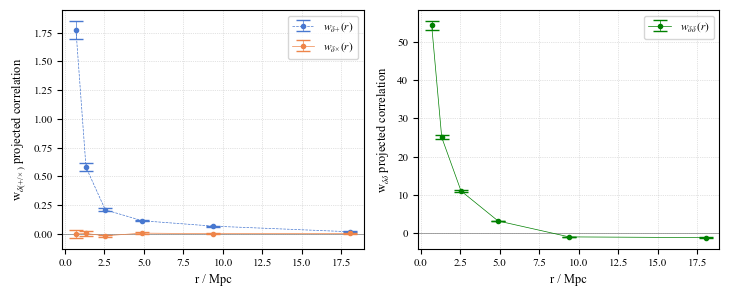

In [17]:
sqrtNx = np.sqrt(wgplusses_x.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(22/3,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wgplusses_x,axis=0), yerr=np.std(wgplusses_x,axis=0)/sqrtNx, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wgcrosses_x,axis=0), yerr=np.std(wgcrosses_x,axis=0)/sqrtNx, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}\,(r)$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(ggs_x,axis=0), yerr=np.std(ggs_x,axis=0)/sqrtNx, linewidth=0.5, elinewidth=0.5 
               , capsize=5, c='green',label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
# ax[0].set_ylim(-0.1*np.abs(ax[0].get_ylim()).max(), np.abs(ax[0].get_ylim()).max())
# ax[1].set_ylim(-0.1*np.abs(ax[1].get_ylim()).max(), np.abs(ax[1].get_ylim()).max())
# ax[0].set_title(r"LH (0 - 1000) average position-shape")
ax[0].set_xlabel("r / Mpc")
ax[0].set_ylabel(r"w$_{\delta (+/\times)}$ projected correlation")
ax[0].legend() ; ax[1].legend()
# ax[1].set_title("LH (0 - 1000) average auto correlation")
ax[1].set_xlabel("r / Mpc")
ax[1].set_ylabel(r"w$_{\delta\delta}$ projected correlation")
fig.tight_layout()

# 2D correlations xi(rp, Pi)

In [47]:
import pickle

# Load the pickled file
file_path = "OUTPUT_CAMELS_LH_z/wgp_LH12.p"
with open(file_path, "rb") as file:
    data = pickle.load(file)

# Check if the unpickled data is a dictionary
if isinstance(data, dict):
    # If it's a dictionary, print all the keys
    sections = data.keys()
    print("Sections in the pickled file:")
    for section in sections:
        print(section)
else:
    print("The unpickled object is not a dictionary.")

Sections in the pickled file:
r
meanr
meanlogr
Pi
w3d
wx3d
noise3d
DS_3d
RS_3d
DD_3d
DSntot
RSntot


In [48]:
meanr = np.array(data['meanr'])
Pi = np.array(data['Pi'])
w3d = np.array(data['w3d'])
wx3d = np.array(data['wx3d'])
print(meanr.shape)
print(Pi)
print(w3d.ndim)
print(wx3d.shape)

(5, 6)
[-5. -3. -1.  1.  3.  5.]
2
(5, 6)


Text(0, 0.5, '$\\Pi$ [Mpc/h]')

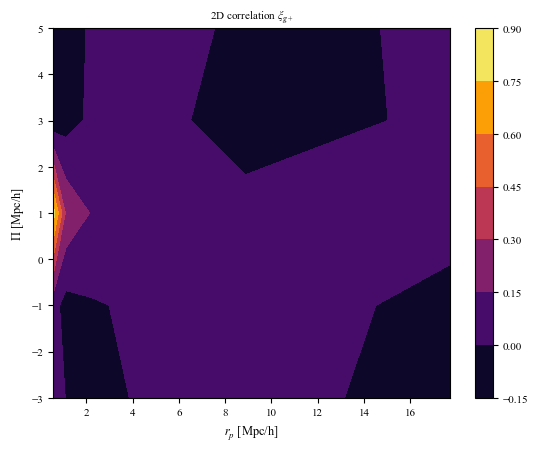

In [49]:
positions_x, y = np.meshgrid(r, Pi[1:])
positions_y = np.repeat(Pi[1:, np.newaxis], meanr.shape[1], axis=1)
# print(positions_y)
# plt.contourf(meanr,positions_y, w3d, cmap='inferno')
plt.contourf(positions_x,positions_y, w3d, cmap='inferno')
plt.colorbar()
plt.title(r'2D correlation $\xi_{g+}$')
plt.xlabel(r'$r_p$ [Mpc/h]')
plt.ylabel(r'$\Pi$ [Mpc/h]')